#### Séries Temprais

Séries Temporais são informações que são coletadas ao longo de tempo. Uma diferença desse modelo em relação aos outros, como por exemplo de regressão, é que na regressão a ordem de obtenção dos dados não importa para a análise. Em uma Série Temporal, essa ordem é fundamental. Cada observação depende da observação anterior e posterior a ela.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime

O conjunto de dados `AirPassengers` contém as informações de transportes de passageiros nos Estados Unidos entre os anos de 1949 e 1960.

In [2]:
dataset = pd.read_csv("data/AirPassengers.csv")
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Pelo método `head` que mostra o cabeçalho o arquivo, observa-se que o dataset contém o número de passageros a cada mês.

In [3]:
dataset.shape

(144, 2)

O atributo `shape` mostra que o dataset contém 144 entradas.

Primeiro, é necessário analisar os tipos de dados das colunas do dataset, utilizando o atributo `dtypes`.

In [4]:
print(dataset.dtypes)

Month          object
#Passengers     int64
dtype: object


O mês está como objeto o que não permite a utilização dele para as análises, para isso, essa coluna precisa ser convertida em um formato de string de data, ANO-MÊS, através do método `strptime` da classe `datetime`.

Para isso cria-se um parser, para receber cada objeto do tipo data e transformá-lo em uma string do formato necessário.

Então o conjunto de dados é reimportado, mas dessa vez com novos parâmetros:
* `parse_dates` - indica qual coluna é a coluna das datas;
* `index_col` - indica qual coluna será a nova coluna de índices;
* `date_parser` - indica qual variável armazena o date parser que será utilizado.

In [5]:
dateparse = lambda dates: datetime.strptime(dates, "%Y-%m")

dataset = pd.read_csv("data/AirPassengers.csv",
                      parse_dates=["Month"],
                      index_col="Month",
                      date_parser=dateparse
)

dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
dataset.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Agora observa-se que a coluna de meses está sendo uitlizada como o índice dos dados. E o seu tipo é objeto do tipo `datetime`.

In [7]:
time_series = dataset["#Passengers"]

A variável time series é criada utilizando a coluna de número de passageiros do dataset.

É possível realizar operações de recuperar dados e dados em intervalos, achar máximo e minimo.

In [8]:
print(f"Escolhendo um ano e um mês:\n{time_series['1949-08']}")
print(f"\nEscolhendo uma data específica:\n{time_series[datetime(1949,9,1)]}")
print(f"\nUitilizando intervalos:\n{time_series['1949-12-01' : '1950-02-01']}")
print(f"\nDo início até uma data específica:\n{time_series[: '1949-03-01']}")
print(f"\nDe uma data específica até o final:\n{time_series['1960-10-01':]}")
print(f"\nUm ano inteiro:\n{time_series['1957']}")
print(f"\nValor máximo e mínimo:\nMáximo: {max(time_series)}\nMínimo: {min(time_series)}")

Escolhendo um ano e um mês:
Month
1949-08-01    148
Name: #Passengers, dtype: int64

Escolhendo uma data específica:
136

Uitilizando intervalos:
Month
1949-12-01    118
1950-01-01    115
1950-02-01    126
Name: #Passengers, dtype: int64

Do início até uma data específica:
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
Name: #Passengers, dtype: int64

De uma data específica até o final:
Month
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

Um ano inteiro:
Month
1957-01-01    315
1957-02-01    301
1957-03-01    356
1957-04-01    348
1957-05-01    355
1957-06-01    422
1957-07-01    465
1957-08-01    467
1957-09-01    404
1957-10-01    347
1957-11-01    305
1957-12-01    336
Name: #Passengers, dtype: int64

Valor máximo e mínimo:
Máximo: 622
Mínimo: 104


Para visualização é possível utilizar o método `plot` da biblioteca `matplotlib`.

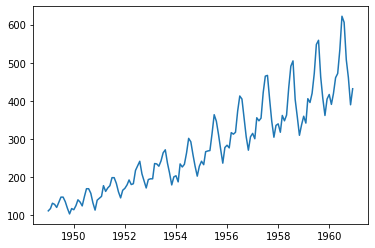

In [9]:
plt.plot(time_series)

Através desse gráfico, inicialmente há uma tendência dos dados aumentarem conforme os anos, logo o número de passageiros aumentam com os anos. Também há uma periodicidade, sazonalidade nos dados, observe como há picos que corroem em intervalos iguais.

Para a visualização por ano, o método `resample` com a função `sum` gera uma série temporal com os valores somados ano a ano.

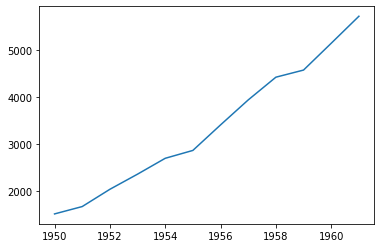

In [10]:
ts_year = time_series.resample("A").sum()
plt.plot(ts_year)

Onde pode ser visto a tendência de crescimento dos dados sem o efeito sazonal.

Para analisar esse efeito sazonal é feito o agrupamento de todos os anos, por mês.

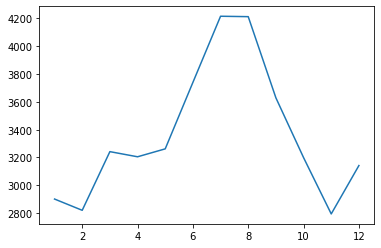

In [11]:
ts_month = time_series.groupby([lambda x: x.month]).sum()
plt.plot(ts_month)

Comparado com as mudanças ao longo do tempo, no ano de 1960: 

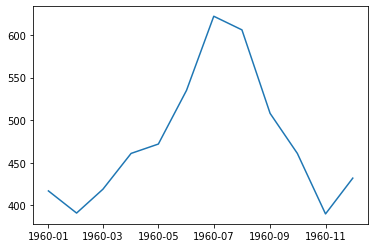

In [12]:
ts_one_year = time_series["1960-01-01" : "1960-12-01"]
plt.plot(ts_one_year)

Onde pode ser observado que essa mudança no ano de 1960 se compara muito bem que o efeito sazonal que foi obtido.

Essa foi uma análise inicial dos dados de uma série temporal, para poder ser observada como os dados são distribuídos.

Para fazer a análise das propriedades da série temporal é ralizado a decomposição da mesma, em tendência, sazonalidade e erro. Essa decomposição é possível através da biblioteca `statsmodels`.

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

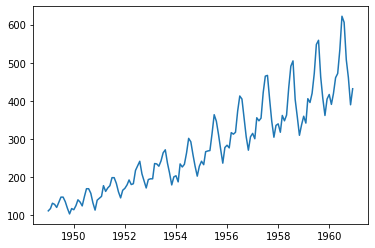

In [14]:
plt.plot(time_series)

Para realizar a decomposição de fato, é necessário utilizar a rotina `seasonal_decompose`. Que recebe como parâmetro uma série temporal e retorna um objeto do tipo seasonal.

In [15]:
decomposicao = seasonal_decompose(time_series)

O objeto resultante, possui as propriedades de tendência (`trend`), sazonalidade (`seasonal`) e resíduo aleatório (`resid`).

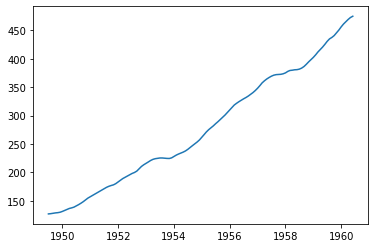

In [16]:
tendencia = decomposicao.trend
plt.plot(tendencia)

O atributo `trend` gera a tendência dos dados, mostrando como eles cresceram ao longo do tempo, sem a influência da sazonalidade.

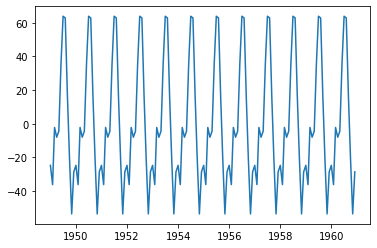

In [17]:
sazonal = decomposicao.seasonal
plt.plot(sazonal)

O atributo `seasonal` retorna a sazonalidade que fica muito mais clara agora, ao ser decomposta é possível ver a alta regularidade da sazonaidalade desses dados.

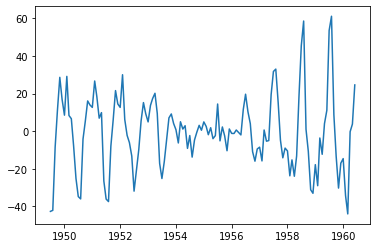

In [18]:
aleatorio = decomposicao.resid
plt.plot(aleatorio)

Esses são os resídos aleatórios recebidos pelo atributo `resid` que retorna os dados que sobraram, que não foram resultados nem da tendência nem na sazonalidade, são dados que não são explicados matematicamente, considerados ruídos.

Para visualizar esses gráficos gerados pode-se utilizar o método `plot` do objeto seasonal, ou então pode-se usar os métodos de visualização da biblioteca `pyplot`.

Utilizando o objeto seasonal:

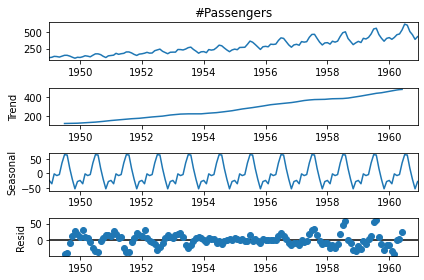

In [19]:
fig = decomposicao.plot()

Agora, para prever o que poderá acontecer com esses dados será usado ARIMA que é uma das técnicas mais importantes de forecasting de séries temporais.

Primeiro, reliza a importação das bibliotecas.

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_predict

Para se utilizar o modelo ARIMA é necessário obter a frequência dos dados para ser passada como parâmetro, isso é feito utilizando o a classe `DatetimeIndex` da biblioteca `pandas` que gera a frequência a partir da periodicidade dos dados.

Para criar o modelo, é instanciado um objeto da classe `ARIMA` que tem como parâmetro a série temporal, uma tripla de ordem (`order`), que é dada por (p, d, q), onde: 
* `p` é a ordem do modelo autoregressivo, representa o número de defasagens; 
* `d` é o grau de diferenciação, representa o número de vezes em que os dados tiveram valores passados subtraídos; 
* `q` é a ordem da média móvel.

In [21]:
time_series.index = pd.DatetimeIndex(
    time_series.index.values,
    freq=time_series.index.inferred_freq
)

model = ARIMA(
    time_series,
    order=(2, 1, 2),
    freq=time_series.index.inferred_freq
)

history = model.fit()
history.summary()

c:\Users\jeanp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Fri, 16 Sep 2022   AIC                           1353.347
Time:                        01:48:51   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.059      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.419      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.798      0.000      -2.087      -1.599
ma.L2          0.9953      0.135      7.374      0.000       0.731       1.260
sigma2       665.9568    114.104      5.836      0.000     442.317     889.597
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.59   Prob(JB):                         0.40
Heteroskedasticity (H):               7.38   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As métricas `AIC` e `BIC` são métricas de performance do modelo, onde quanto menor esses valores, melhor está o modelo.

Para realizar as previsões, é utilizado o método `forecast` do objeto resultante do `ARIMA`. O arumento `steps` indica quantos passos no "futuro" devem ser previstos.

In [22]:
history.forecast(steps=12)

1961-01-01    439.855344
1961-02-01    465.297276
1961-03-01    500.666674
1961-04-01    535.971564
1961-05-01    561.688584
1961-06-01    571.311503
1961-07-01    562.970543
1961-08-01    539.727529
1961-09-01    508.527028
1961-10-01    478.147167
1961-11-01    456.748248
1961-12-01    449.698762
Freq: MS, Name: predicted_mean, dtype: float64

Pode ser observado, com 12 steps, a previsão de passageiro no ano seguinte ao fim do conjunto de dados.

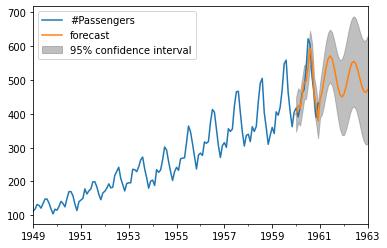

In [23]:
axis = time_series.plot()
fig = plot_predict(history, "1960-01-01", "1963-01-01", ax=axis, plot_insample=True)

Gerando a previsão, em laranja, e o intervalo de 95% de confiança, em cinza. Observe que há uma interseção entre os valores previstos e os valores dos dados, isso foi feito para verificar se há uma boa relação entre a previsão e os dados.

É possível utilizar um modelo que calcule os valores de ordem (p, d, q) de forma autmática, o `auto_arima` que é uma rotina da biblioteca `pmdarima`. Ele calcula os valores de ordem itrativamente variando os parâmetros e contrando os menores índices `AIC` e `BIC`. Para isso é passado como parâmetro, a série temporal, o intervalo que se quer prever, se há uma sazonalidade dos dados.

In [24]:
history = auto_arima(
    time_series,
    m=12,
    seasonal=True,
    trace=False
)

history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Fri, 16 Sep 2022   AIC                           1017.847
Time:                                     01:48:55   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.600      0.000      -1.057      -0.907
sigma2       129.3144     14.557      8.883      0.000     100.784     157.845
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

O método `predict` mostra a previsão dos próximos 12 meses.

In [25]:
history.predict(n_periods=12)

array([445.63493376, 420.39504209, 449.19837837, 491.84002287,
       503.39456532, 566.86255005, 654.26028432, 638.59760354,
       540.88386366, 494.12674814, 423.33284088, 465.50771217])